# purpose
- public health:identify trends in population health such as obesity

In [1]:
import os
os.getcwd() #my current path

'C:\\Users\\Prashanth\\Desktop\\Naresh_it\\MachineLearning\\project'

In [2]:
# imporing EDA Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# importing algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# evalution matrics
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv(r"C:\Users\Prashanth\Desktop\Naresh_it\MachineLearning\Data\SOCR-HeightWeight.csv")
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [8]:
# converting weights pounds to kgs
df['Weight_kg']=df['Weight(Pounds)']*0.453592
# convert inches to the desired format 
df['Height(Feet.Inches)']=df['Height(Inches)']//12+(df['Height(Inches)']%12)/10

In [9]:
df.head()

,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet.Inches)
0,1,65.78331,112.9925,51.252494,5.578331
1,2,71.51521,136.4873,61.909547,6.151521
2,3,69.39874,153.0269,69.411778,5.939874
3,4,68.21660,142.3354,64.562199,5.821660
4,5,67.78781,144.2971,65.452010,5.778781


In [10]:
df.describe()

,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,57.642209,5.795967
std,7217.022701,1.901679,11.660898,5.289290,0.183513
min,1.000000,60.278360,78.014760,35.386871,5.027836
25%,6250.750000,66.704397,119.308675,54.117461,5.670440
50%,12500.500000,67.995700,127.157750,57.677738,5.799570
75%,18750.250000,69.272958,134.892850,61.186318,5.927296
max,25000.000000,75.152800,170.924000,77.529759,6.315280


In [11]:
df.isnull()

,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet.Inches)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
24995,False,False,False,False,False
24996,False,False,False,False,False
24997,False,False,False,False,False
24998,False,False,False,False,False


In [12]:
df.isnull().sum()

Index                  0
Height(Inches)         0
Weight(Pounds)         0
Weight_kg              0
Height(Feet.Inches)    0
dtype: int64

In [14]:
drop_col=['Index','Height(Inches)','Weight(Pounds)']
df=df.drop(columns=drop_col,axis=1)

In [15]:
df.tail()

,Weight_kg,Height(Feet.Inches)
24995,53.538008,5.950215
24996,54.518674,5.454826
24997,53.644285,5.469855
24998,59.995797,5.752918
24999,56.641938,5.887761


In [18]:
df.sample(3) # it will give random row information

,Weight_kg,Height(Feet.Inches)
6437,50.852426,5.863966
7158,59.023205,5.898253
11531,60.951697,6.194657


In [20]:
df.shape

(25000, 2)

In [21]:
df.isna().any()

Weight_kg              False
Height(Feet.Inches)    False
dtype: bool

In [22]:
df.dtypes

Weight_kg              float64
Height(Feet.Inches)    float64
dtype: object

In [23]:
df.corr()#correlation

,Weight_kg,Height(Feet.Inches)
Weight_kg,1.000000,0.499192
Height(Feet.Inches),0.499192,1.000000


In [24]:
df.describe()

,Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000
mean,57.642209,5.795967
std,5.289290,0.183513
min,35.386871,5.027836
25%,54.117461,5.670440
50%,57.677738,5.799570
75%,61.186318,5.927296
max,77.529759,6.315280


# checking outliears using boxplot

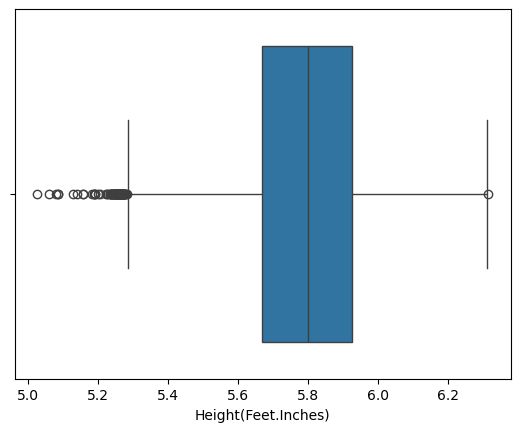

In [25]:
sns.boxplot(x=df['Height(Feet.Inches)']);

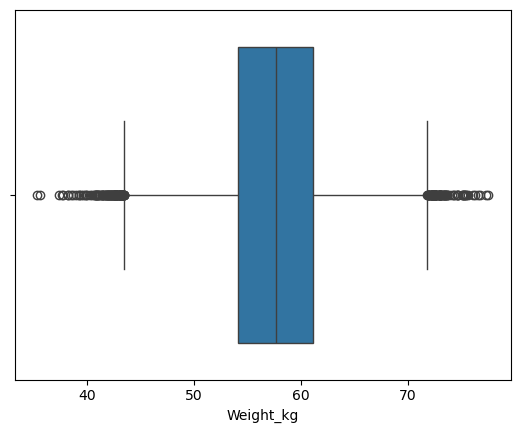

In [26]:
sns.boxplot(x=df['Weight_kg']); #checking outliers for

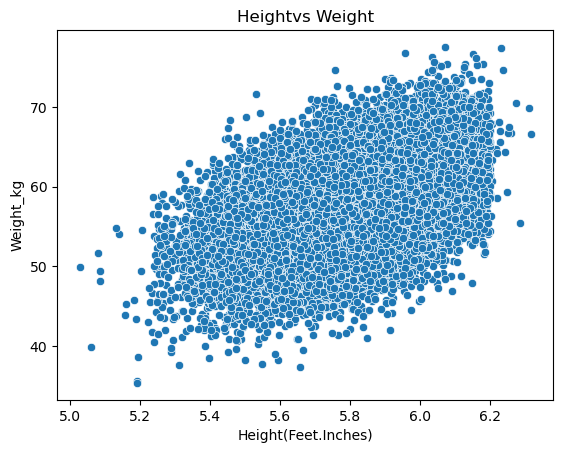

In [28]:
x=df['Height(Feet.Inches)']
y=df['Weight_kg']

sns.scatterplot(x=x,y=y)
plt.title('Heightvs Weight')
plt.xlabel('Height(Feet.Inches)')
plt.show()

In [29]:
df.sample(3)

,Weight_kg,Height(Feet.Inches)
6397,55.166812,5.948254
17114,44.251846,5.567921
15584,54.437481,5.607605


In [30]:
# spliting the data into depended and independent variables
X=df.iloc[:,1]
y=df.iloc[:,0]

In [31]:
X

0        5.578331
1        6.151521
2        5.939874
3        5.821660
4        5.778781
           ...   
24995    5.950215
24996    5.454826
24997    5.469855
24998    5.752918
24999    5.887761
Name: Height(Feet.Inches), Length: 25000, dtype: float64

In [32]:
df.columns[0]

'Weight_kg'

In [34]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X.values.reshape(-1,1))


scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))